<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Homework4/Homework4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports and attaching drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Binary map Outputs to 0 or 1
# M = 1
# B = 0
# Map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dataset[varlist] = dataset[varlist].apply(binary_map)
# Remove uneeded information
dataset.pop('furnishingstatus')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
# Standarize the data to remove size differences
stdScaler = StandardScaler()
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataset[num_vars] = stdScaler.fit_transform(dataset[num_vars])
# Seperate data into inputs and outputs

Y = dataset.pop('price')
X = dataset.values
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.51769249,  1.80494113],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.4726183 ,
         2.67940935, -0.55403469],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.67906259,
         1.51769249,  1.80494113],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124, -0.55403469],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.80574124, -0.55403469]])

In [ ]:
# Split into test and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 77)
X_train[0]

array([ 0.13811721,  1.40341936,  1.42181174, -0.92939666,  0.40562287,
       -0.46531479,  1.3613975 , -0.2192645 ,  1.4726183 , -0.80574124,
        1.80494113])

In [ ]:
# PCA to reduce dimensions
K = np.arange(1, 11, 1)
linLoss = []
polyLoss = []
rbfLoss = []

for k in K:
    pca = PCA(n_components=k)
    pc_train = pca.fit_transform(X_train)
    pc_test = pca.fit_transform(X_test)

    # Linear SVR
    svr_lin = SVR(kernel='linear', C=1e2)
    Y_linear_pred = svr_lin.fit(pc_train, Y_train).predict(pc_test)
    linLoss.append(metrics.mean_squared_error(Y_test, Y_linear_pred))
    # Poly SVR
    svr_poly = SVR(kernel='poly', C=1, degree=3)
    Y_poly_pred = svr_poly.fit(pc_train, Y_train).predict(pc_test)
    polyLoss.append(metrics.mean_squared_error(Y_test, Y_poly_pred))
    # RBF SVR
    svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1)
    Y_rbf_pred = svr_rbf.fit(pc_train, Y_train).predict(pc_test)
    rbfLoss.append(metrics.mean_squared_error(Y_test, Y_rbf_pred))

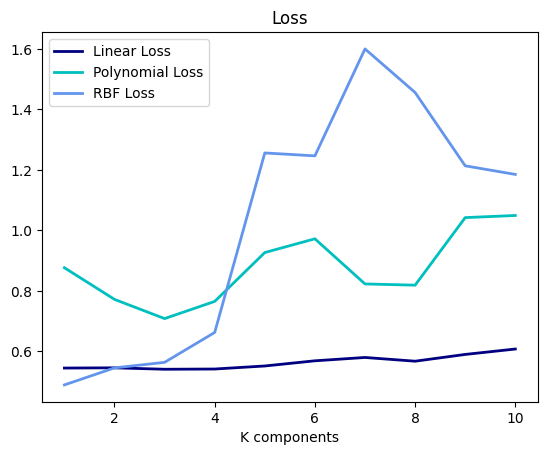

In [ ]:
# RESULTS
# Graphing the results compared to K values
lw = 2
plt.plot(K, linLoss, color='navy', lw=lw, label='Linear Loss')
plt.plot(K, polyLoss, color='c', lw=lw, label='Polynomial Loss')
plt.plot(K, rbfLoss, color='cornflowerblue', lw=lw, label='RBF Loss')
plt.xlabel('K components')
plt.title('Loss')
plt.legend()
plt.show()